Inspired in: https://playground.tensorflow.org/

In [1]:
using Revise
using PyPlot, OCDNN

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1317
┌ Info: Precompiling OCDNN [04e95dd8-2660-4c0e-9d70-3f4d10bb3a0d]
└ @ Base loading.jl:1317


In [274]:
dataset = build_dataset(N_samples = 20, N_noise = 0);
data, feat = dataset;

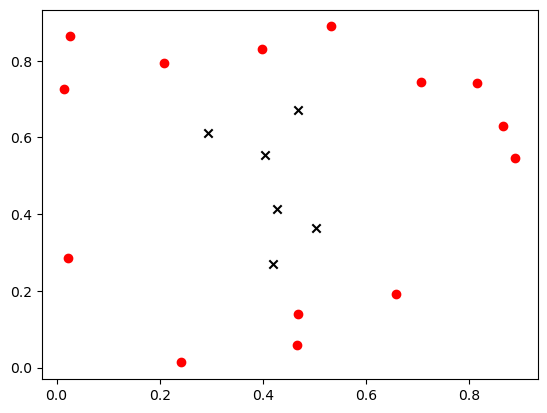

PyObject <matplotlib.collections.PathCollection object at 0x00000000652ABB48>

In [322]:
scatter(data[:,1][idxs],data[:,2][idxs],marker="x", c = "k")
scatter(data[:,1][.!idxs],data[:,2][.!idxs],marker="o", c = "r")

In [308]:
nlayers = 5
channels = 2
niter = 10000
τ=0.1;
τ_max=10;
stepsize = 0.1;

In [309]:
A_eu = 0;
w_eu = 1;
A_ie = [0 0 1 0];
w_ie = [0.5  0.5];
A_kutta4 = [0 0 0 0;0.5 0 0 0;0 0.5 0 0;0 0 1 0];
w_kutta4 = 1/6*[1;2;2;1];
A_kutta3 = [0 0 0;1/2 0 0;-1 2 0];
w_kutta3 = [1/6;2/3;1/6];

In [310]:
rkmethod = OCDNN.ExplicitRungeKutta(A_kutta4,w_kutta4,"RK4");

In [324]:
Ctrls,F,Fn = train_ode_dnn(dataset, nlayers, channels, rkmethod, niter, τ, τ_max, stepsize);


Method=RK4, nlayers=5
Iteration no: 1
Value of alpha:  0.1000
Residual:   2.1632
Norm Grad: 1.2572e-01

Method=RK4, nlayers=5
Iteration no: 2000
Value of alpha: 10.0000
Residual:   0.0029
Norm Grad: 5.3373e-04

Method=RK4, nlayers=5
Iteration no: 4000
Value of alpha: 10.0000
Residual:   0.0011
Norm Grad: 1.7908e-04

Method=RK4, nlayers=5
Iteration no: 6000
Value of alpha: 10.0000
Residual:   0.0007
Norm Grad: 1.1020e-04

Method=RK4, nlayers=5
Iteration no: 8000
Value of alpha: 10.0000
Residual:   0.0005
Norm Grad: 8.0165e-05

Method=RK4, nlayers=5
Iteration no: 10000
Value of alpha: 10.0000
Residual:   0.0004
Norm Grad: 6.3144e-05


In [325]:
Ctrls_test = deepcopy(Ctrls);

In [326]:
xs = collect(0:0.01:1)
ys = collect(0:0.01:1);

In [327]:
Y0_test = [[x,y] for x in xs, y in ys];

In [328]:
Ctrls_test.Y0 = hcat(Y0_test...)';

In [316]:
S = OCDNN.RKforwardstepper(Ctrls_test,rkmethod,zeros(1));

In [317]:
values = reshape(round.(S.Classifier), size(Y0_test))';

In [318]:
idxs = feat .== 1;
N = sum(idxs);
M = sum(.!idxs);

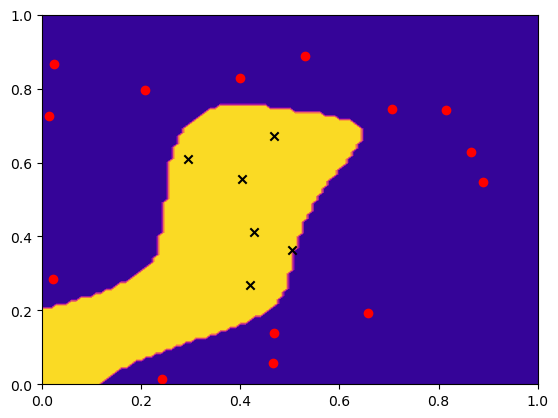

PyObject <matplotlib.collections.PathCollection object at 0x00000000648C03C8>

In [319]:
contourf(xs,ys, values, cmap = "plasma", s = 15)
scatter(data[:,1][idxs],data[:,2][idxs],marker="x", c = "k")
scatter(data[:,1][.!idxs],data[:,2][.!idxs],marker="o", c = "r")